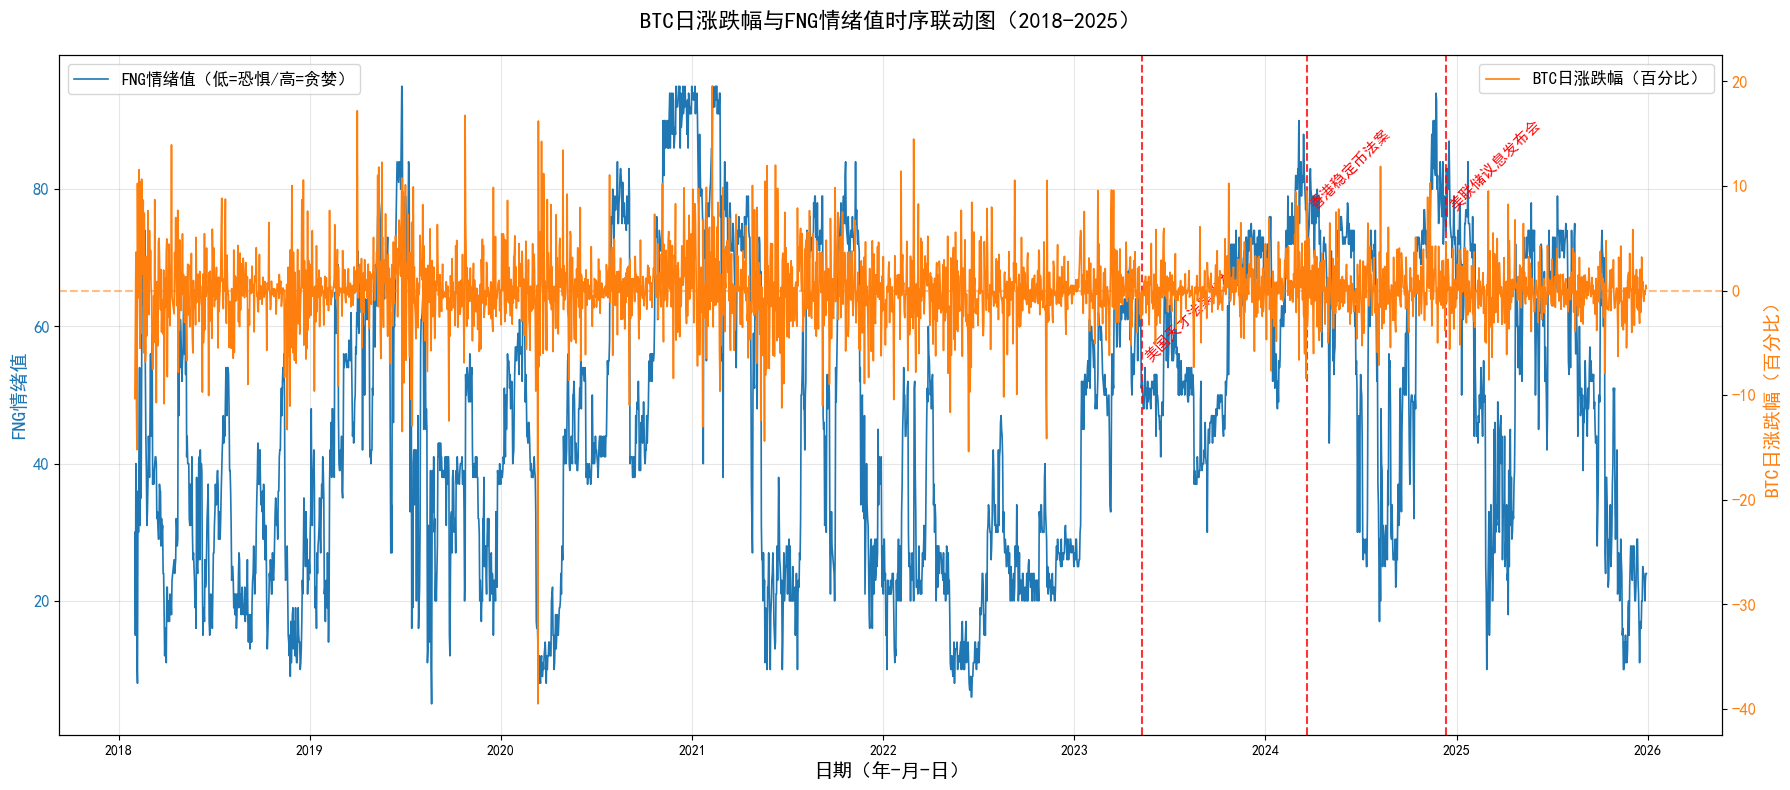

===== 路径1：相关性分析结果 =====
FNG情绪值 与 BTC次日涨跌幅（百分比） 的皮尔逊相关系数：0.0373
显著性检验P值：0.045177
结论：情绪值越高（贪婪），次日涨跌幅越高，呈显著正相关（p<0.05）


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# ========== 1. 读取清洗后的数据 ==========
data_path = r"C:\Users\33759\Desktop\自选动作 陈正扬 2326010229\修改后数据\BTC_FNG_清洗后数据.xlsx"
df = pd.read_excel(data_path)
df['日期'] = pd.to_datetime(df['日期'])  # 确保日期为datetime格式

# ========== 2. 可视化：双轴时序联动图 ==========
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax1 = plt.subplots(figsize=(18, 8))

# 左轴：FNG情绪值
ax1.plot(df['日期'], df['情绪值'], color='#1f77b4', linewidth=1.2, label='FNG情绪值（低=恐惧/高=贪婪）')
ax1.set_xlabel('日期（年-月-日）', fontsize=14)
ax1.set_ylabel('FNG情绪值', color='#1f77b4', fontsize=14)
ax1.tick_params(axis='y', labelcolor='#1f77b4', labelsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(alpha=0.3)

# 右轴：BTC日涨跌幅（百分比）
ax2 = ax1.twinx()
ax2.plot(df['日期'], df['涨跌幅（百分比）'], color='#ff7f0e', linewidth=1.2, label='BTC日涨跌幅（百分比）')
ax2.set_ylabel('BTC日涨跌幅（百分比）', color='#ff7f0e', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#ff7f0e', labelsize=12)
ax2.legend(loc='upper right', fontsize=12)
ax2.axhline(y=0, color='#ff7f0e', linestyle='--', alpha=0.5)

# 标注重大事件
events = {
    '美国天才法案发布': '2023-05-10',
    '美联储议息发布会': '2024-12-11',
    '香港稳定币法案': '2024-03-20'
}
for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    if event_date in df['日期'].values:
        event_row = df[df['日期'] == event_date]
        ax1.axvline(x=event_date, color='red', linestyle='--', alpha=0.8, linewidth=1.5)
        ax1.text(event_date, event_row['情绪值'].values[0]+3, event_name, rotation=45, color='red', fontsize=11)

plt.title('BTC日涨跌幅与FNG情绪值时序联动图（2018-2025）', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig(r"C:\Users\33759\Desktop\自选动作 陈正扬 2326010229\结果数据\路径1_时序联动图.png", dpi=300, bbox_inches='tight')
plt.show()

# ========== 3. 量化分析：皮尔逊相关系数+显著性检验 ==========
# 情绪值 vs 次日涨跌幅（核心分析：情绪对次日价格的影响）
corr_coef, p_value = pearsonr(df['情绪值'], df['次日涨跌幅（百分比）'])
print("===== 路径1：相关性分析结果 =====")
print(f"FNG情绪值 与 BTC次日涨跌幅（百分比） 的皮尔逊相关系数：{corr_coef:.4f}")
print(f"显著性检验P值：{p_value:.6f}")
if p_value < 0.05:
    if corr_coef > 0:
        print("结论：情绪值越高（贪婪），次日涨跌幅越高，呈显著正相关（p<0.05）")
    else:
        print("结论：情绪值越低（恐惧），次日涨跌幅越高，呈显著负相关（p<0.05）")
else:
    print("结论：情绪值与次日涨跌幅的线性相关关系不显著（p≥0.05）")